# Customer Analysis with K-means Clustering

In [1]:

import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

pd.options.display.float_format = '{:20.2f}'.format

pd.set_option('display.max_columns', 999)

## Data Exploration
--- 

In [2]:
df = pd.read_csv('/kaggle/input/online-retail-ii-uci/online_retail_II.csv')
df.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.00,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.00,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.00,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.00,United Kingdom


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


Changing the InoviceDate datatype to datetime64 as object is the **wrong data type** for it in this case.

In [4]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 65.1+ MB


There are **null values** in Description and Customer ID which need to be handled.

In [5]:
df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,1067371.00,1067371,1067371.00,824364.00
mean,9.94,2011-01-02 21:13:55.394028544,4.65,15324.64
min,-80995.00,2009-12-01 07:45:00,-53594.36,12346.00
25%,1.00,2010-07-09 09:46:00,1.25,13975.00
50%,3.00,2010-12-07 15:28:00,2.10,15255.00
75%,10.00,2011-07-22 10:23:00,4.15,16797.00
max,80995.00,2011-12-09 12:50:00,38970.00,18287.00
std,172.71,NaN,123.55,1697.46


There are **negative values** in Quantity and Price, and Customer ID entries are **not equal** to the rest. Object data type has been excluded from the describe function.

In [6]:
df.describe(include = 'O') #Includes the desciption for Object datatypes

,Invoice,StockCode,Description,Country
count,1067371,1067371,1062989,1067371
unique,53628,5305,5698,43
top,537434,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,1350,5829,5918,981330


In [7]:
df[df["Customer ID"].isna()].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.00,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom
578,489525,85227,SET/6 3D KIT CARDS FOR KIDS,1,2009-12-01 11:49:00,0.85,NaN,United Kingdom
1055,489548,22271,FELTCRAFT DOLL ROSIE,1,2009-12-01 12:32:00,2.95,NaN,United Kingdom
1056,489548,22254,FELT TOADSTOOL LARGE,12,2009-12-01 12:32:00,1.25,NaN,United Kingdom
1057,489548,22273,FELTCRAFT DOLL MOLLY,3,2009-12-01 12:32:00,2.95,NaN,United Kingdom
1058,489548,22195,LARGE HEART MEASURING SPOONS,1,2009-12-01 12:32:00,1.65,NaN,United Kingdom


Considering to exclude entries with null Customer ID as they can not be analysied without customer information.

In [8]:
df[df["Quantity"] < 0].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.00,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.00,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.00,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
183,C489449,21871,SAVE THE PLANET MUG,-12,2009-12-01 10:33:00,1.25,16321.00,Australia
184,C489449,84946,ANTIQUE SILVER TEA GLASS ETCHED,-12,2009-12-01 10:33:00,1.25,16321.00,Australia
185,C489449,84970S,HANGING HEART ZINC T-LIGHT HOLDER,-24,2009-12-01 10:33:00,0.85,16321.00,Australia
186,C489449,22090,PAPER BUNTING RETRO SPOTS,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
196,C489459,90200A,PURPLE SWEETHEART BRACELET,-3,2009-12-01 10:44:00,4.25,17592.00,United Kingdom


In [9]:
 df[df["Price"] < 0].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,NaN,United Kingdom
825444,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
825445,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


Need to consider Invoice with prefixes like '**C**' which indicate a cancellation.

In [10]:
df["Invoice"] = df["Invoice"].astype("str")
df[df["Invoice"].str.match("^\\d{6}$") == False] #It matches records witch do not excatly match 6 digits only. 

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.00,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.00,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.00,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
...,...,...,...,...,...,...,...,...
1065910,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.00,United Kingdom
1067002,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.00,United Kingdom
1067176,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.00,United Kingdom
1067177,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.00,United Kingdom


In [11]:
df["Invoice"].str.replace("[0-9]", "", regex = True).unique() #replaces alls the digits with nothing and gets all the unique values

array(['', 'C', 'A'], dtype=object)

In [12]:
df[df["Invoice"].str.startswith("A")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,NaN,United Kingdom
825443,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,11062.06,NaN,United Kingdom
825444,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
825445,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


Need to consider excluding Invoices which start with '**C**' and '**A**'. '**C**' stands for Cancelation and '**A**' stands for Adjust bad debt.

In [13]:
df["StockCode"] = df["StockCode"].astype("str")
df[(df["StockCode"].str.match("^\\d{5}$") == False) & (df["StockCode"].str.match("^\\d{5}[a-zA-Z]+$") == False)]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
89,489439,POST,POSTAGE,3,2009-12-01 09:28:00,18.00,12682.00,France
126,489444,POST,POSTAGE,1,2009-12-01 09:55:00,141.00,12636.00,USA
173,489447,POST,POSTAGE,1,2009-12-01 10:10:00,130.00,12362.00,Belgium
625,489526,POST,POSTAGE,6,2009-12-01 11:50:00,18.00,12533.00,Germany
735,C489535,D,Discount,-1,2009-12-01 12:11:00,9.00,15299.00,United Kingdom
...,...,...,...,...,...,...,...,...
1067002,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.00,United Kingdom
1067191,581570,POST,POSTAGE,1,2011-12-09 11:59:00,18.00,12662.00,Germany
1067228,581574,POST,POSTAGE,2,2011-12-09 12:09:00,18.00,12526.00,Germany
1067229,581578,POST,POSTAGE,3,2011-12-09 12:16:00,18.00,12713.00,Germany


In [14]:
df[(df["StockCode"].str.match("^\\d{5}$") == False) & (df["StockCode"].str.match("^\\d{5}[a-zA-Z]+$") == False)]["StockCode"].unique()

array(['POST', 'D', 'DCGS0058', 'DCGS0068', 'DOT', 'M', 'DCGS0004',
       'DCGS0076', 'C2', 'BANK CHARGES', 'DCGS0003', 'TEST001',
       'gift_0001_80', 'DCGS0072', 'gift_0001_20', 'DCGS0044', 'TEST002',
       'gift_0001_10', 'gift_0001_50', 'DCGS0066N', 'gift_0001_30',
       'PADS', 'ADJUST', 'gift_0001_40', 'gift_0001_60', 'gift_0001_70',
       'gift_0001_90', 'DCGSSGIRL', 'DCGS0006', 'DCGS0016', 'DCGS0027',
       'DCGS0036', 'DCGS0039', 'DCGS0060', 'DCGS0056', 'DCGS0059', 'GIFT',
       'DCGSLBOY', 'm', 'DCGS0053', 'DCGS0062', 'DCGS0037', 'DCGSSBOY',
       'DCGSLGIRL', 'S', 'DCGS0069', 'DCGS0070', 'DCGS0075', 'B',
       'DCGS0041', 'ADJUST2', '47503J ', 'C3', 'SP1002', 'AMAZONFEE',
       'DCGS0055', 'DCGS0074', 'DCGS0057', 'DCGS0073', 'DCGS0071',
       'DCGS0066P', 'DCGS0067', 'CRUK'], dtype=object)

In [15]:
df[df["StockCode"].str.contains("^gift")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
30620,491968,gift_0001_80,NaN,2,2009-12-14 17:56:00,0.00,NaN,United Kingdom
31079,491969,gift_0001_80,Dotcomgiftshop Gift Voucher £80.00,1,2009-12-14 17:57:00,69.56,NaN,United Kingdom
32048,491971,gift_0001_20,Dotcomgiftshop Gift Voucher £20.00,2,2009-12-14 18:37:00,17.39,NaN,United Kingdom
40904,492782,gift_0001_10,Dotcomgiftshop Gift Voucher £10.00,1,2009-12-18 17:06:00,8.69,NaN,United Kingdom
40905,492782,gift_0001_20,Dotcomgiftshop Gift Voucher £20.00,1,2009-12-18 17:06:00,17.39,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
842962,564761,gift_0001_30,NaN,30,2011-08-30 10:48:00,0.00,NaN,United Kingdom
845901,564974,gift_0001_10,Dotcomgiftshop Gift Voucher £10.00,2,2011-08-31 15:32:00,8.33,NaN,United Kingdom
847625,565231,gift_0001_30,Dotcomgiftshop Gift Voucher £30.00,1,2011-09-02 09:26:00,25.00,NaN,United Kingdom
956810,573585,gift_0001_20,Dotcomgiftshop Gift Voucher £20.00,1,2011-10-31 14:41:00,16.67,NaN,United Kingdom


Need to take into consideration all the **unexpected entries** Stock Code and check them indvidually for their purpose. The below table is the conclusion after inspecting each code.

| Code              | Description                                                                                      | Action                 |
|-------------------|--------------------------------------------------------------------------------------------------|------------------------|
| DCGS              | Looks valid, some quantities are negative though and customer ID is null                          | Exclude from clustering|
| D                 | Looks valid, represents discount values                                                           | Exclude from clustering|
| DOT               | Looks valid, represents postage charges                                                           | Exclude from clustering|
| M or m            | Looks valid, represents manual transactions                                                       | Exclude from clustering|
| C2                | Carriage transaction - not sure what this means                                                   | Exclude from clustering|
| C3                | Not sure, only 1 transaction                                                                      | Exclude                |
| BANK CHARGES or B | Bank charges                                                                                      | Exclude from clustering|
| S                 | Samples sent to customer                                                                          | Exclude from clustering|
| TESTXXX           | Testing data, not valid                                                                           | Exclude from clustering|
| gift__XXX         | Purchases with gift cards, might be interesting for another analysis, but no customer data         | Exclude                |
| PADS              | Looks like a legit stock code for padding                                                         | Include                |
| SP1002            | Looks like a special request item, only 2 transactions, 3 look legit, 1 has 0 pricing             | Exclude for now        |
| AMAZONFEE         | Looks like fees for Amazon shipping or something                                                  | Exclude for now        |
| ADJUSTX           | Looks like manual account adjustments by admins                                                   | Exclude for now        |


## Data Cleaning
---

In [16]:
cleaned_df = df.copy()

Filtering for additional Invoices and StockCode we found in the previous section.

In [17]:
cleaned_df["Invoice"] = cleaned_df["Invoice"].astype("str") #accessing invoice column as string

mask = (
    cleaned_df["Invoice"].str.match("^\\d{6}$") == True #filtering for invoice without c or a prefix
)

cleaned_df = cleaned_df[mask]
cleaned_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.00,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.00,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.00,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.00,France


In [18]:
cleaned_df.loc[:, "StockCode"] = cleaned_df["StockCode"].astype("str")


mask = (
    (cleaned_df["StockCode"].str.match("^\\d{5}$") == True) #filter for exactly 5 digits
    |(cleaned_df["StockCode"].str.match("^\\d{5}[a-zA-Z]+$") == True) #filter for exactly 5 digits + any prefix
    |(cleaned_df["StockCode"].str.match("^PADS$") == True) #filter for StockCode for pads
)

cleaned_df = cleaned_df[mask]
cleaned_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
...,...,...,...,...,...,...,...,...
1067365,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.00,France
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.00,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.00,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.00,France


In [19]:
cleaned_df.dropna(subset=["Customer ID"], inplace = True) #Removing the null entries in Customer ID

/tmp/ipykernel_18/3275498542.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df.dropna(subset=["Customer ID"], inplace = True) #Removing the null entries in Customer ID


In [20]:
cleaned_df = cleaned_df[cleaned_df["Price"] > 0] #Filtering out records with 0 prices

In [21]:
len(cleaned_df[cleaned_df["Price"] == 0])

0

In [22]:
cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,802649.00,802649,802649.00,802649.00
mean,13.32,2011-01-02 09:19:54.210121984,2.93,15338.15
min,1.00,2009-12-01 07:45:00,0.00,12346.00
25%,2.00,2010-07-07 11:53:00,1.25,13988.00
50%,5.00,2010-12-03 14:54:00,1.95,15276.00
75%,12.00,2011-07-28 13:02:00,3.75,16809.00
max,80995.00,2011-12-09 12:50:00,649.50,18287.00
std,143.87,NaN,4.28,1693.90


In [23]:
(len(cleaned_df)/len(df))*100 #Percentage of data left after cleaning compared to original data

75.19868911559337

Dropped about 25% of data during cleaning

## Feature Engineering
---

Going to add the following features to the dataset to help us in analysis: 
* **Monetary Value** : this the total amount of money spent by a single customer
* **Frequency** : total amout of purchases or invoices of a single customer
* **Last Invoice Date** : when was the last purchase made
* **Recency** : how many days since the last purchase

In [24]:
cleaned_df["SalesLineTotal"] = cleaned_df["Quantity"] * cleaned_df["Price"]

cleaned_df

/tmp/ipykernel_18/2846558921.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df["SalesLineTotal"] = cleaned_df["Quantity"] * cleaned_df["Price"]


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,SalesLineTotal
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...
1067365,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.00,France,10.20
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.00,France,12.60
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.00,France,16.60
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.00,France,16.60


In [25]:
aggregated_df = cleaned_df.groupby(by="Customer ID", as_index=False) \
    .agg(
        MonetaryValue = ("SalesLineTotal", "sum"),
        Frequency = ("Invoice", "nunique"),
        LastInvoiceDate = ("InvoiceDate", "max")
    )
aggregated_df.head()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate
0,12346.00,77352.96,3,2011-01-18 10:01:00
1,12347.00,5633.32,8,2011-12-07 15:52:00
2,12348.00,1658.40,5,2011-09-25 13:13:00
3,12349.00,3678.69,3,2011-11-21 09:51:00
4,12350.00,294.40,1,2011-02-02 16:01:00


In [26]:
max_invoice_date = aggregated_df["LastInvoiceDate"].max()

aggregated_df["Recency"] = (max_invoice_date - aggregated_df["LastInvoiceDate"]).dt.days

aggregated_df.head()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
0,12346.00,77352.96,3,2011-01-18 10:01:00,325
1,12347.00,5633.32,8,2011-12-07 15:52:00,1
2,12348.00,1658.40,5,2011-09-25 13:13:00,74
3,12349.00,3678.69,3,2011-11-21 09:51:00,18
4,12350.00,294.40,1,2011-02-02 16:01:00,309


Finding and handling **outliers** in the data.

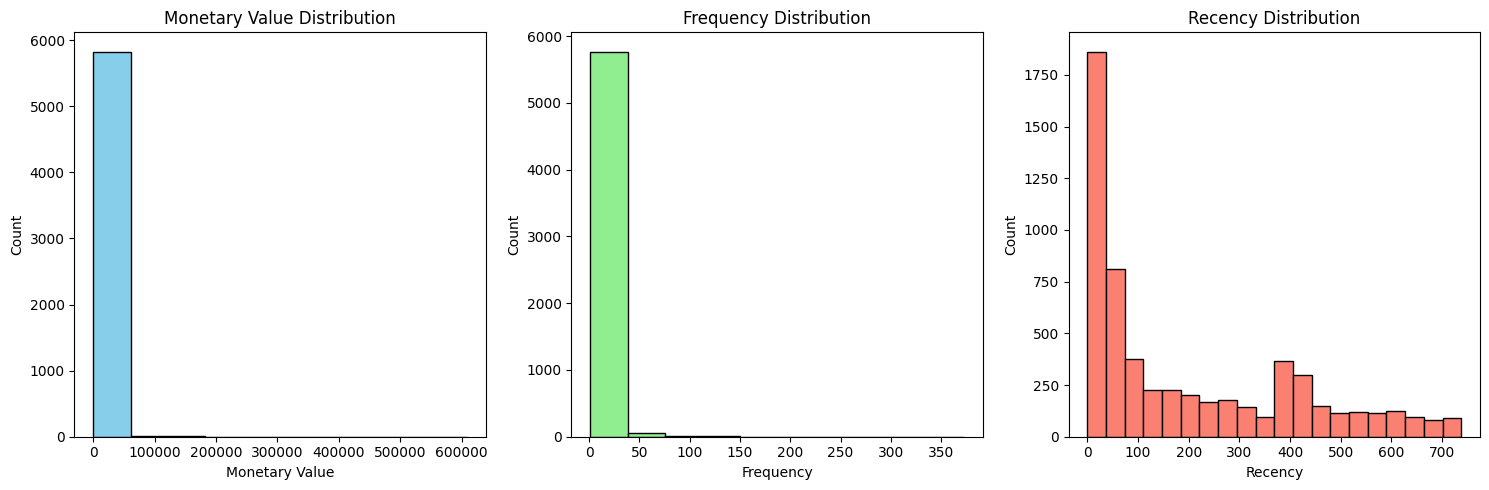

In [27]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(aggregated_df['MonetaryValue'], bins=10, color='skyblue', edgecolor='black')
plt.title('Monetary Value Distribution')
plt.xlabel('Monetary Value')
plt.ylabel('Count')

plt.subplot(1, 3, 2)
plt.hist(aggregated_df['Frequency'], bins=10, color='lightgreen', edgecolor='black')
plt.title('Frequency Distribution')
plt.xlabel('Frequency')
plt.ylabel('Count')

plt.subplot(1, 3, 3)
plt.hist(aggregated_df['Recency'], bins=20, color='salmon', edgecolor='black')
plt.title('Recency Distribution')
plt.xlabel('Recency')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

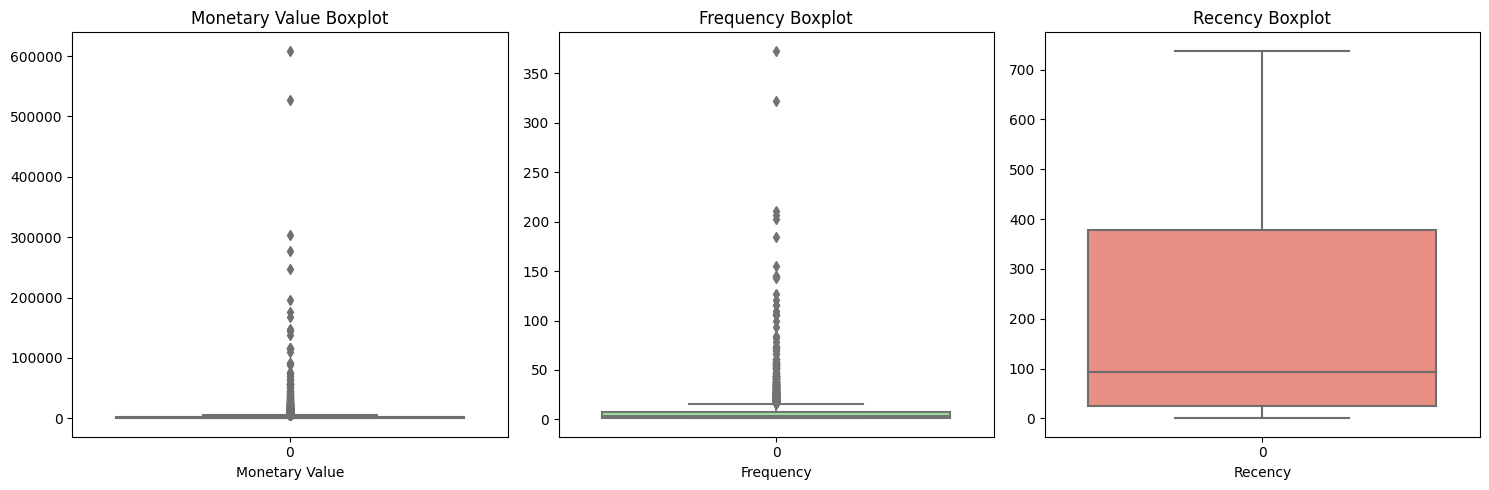

In [28]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(data=aggregated_df['MonetaryValue'], color='skyblue')
plt.title('Monetary Value Boxplot')
plt.xlabel('Monetary Value')

plt.subplot(1, 3, 2)
sns.boxplot(data=aggregated_df['Frequency'], color='lightgreen')
plt.title('Frequency Boxplot')
plt.xlabel('Frequency')

plt.subplot(1, 3, 3)
sns.boxplot(data=aggregated_df['Recency'], color='salmon')
plt.title('Recency Boxplot')
plt.xlabel('Recency')

plt.tight_layout()
plt.show()

In [29]:
M_Q1 = aggregated_df["MonetaryValue"].quantile(0.25)
M_Q3 = aggregated_df["MonetaryValue"].quantile(0.75)
M_IQR = M_Q3 - M_Q1

monetary_outliers_df = aggregated_df[(aggregated_df["MonetaryValue"] > (M_Q3 + 1.5 * M_IQR)) | (aggregated_df["MonetaryValue"] < (M_Q1 - 1.5 * M_IQR))].copy()

monetary_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,620.00,620.00,620.00,620,620.00
mean,15077.78,18260.64,25.98,2011-10-19 01:33:52.548387072,50.98
min,12346.00,5217.44,1.00,2010-01-17 11:33:00,0.00
25%,13573.00,6591.86,12.00,2011-10-23 01:02:00,4.00
50%,14924.00,9131.81,18.00,2011-11-23 12:34:30,16.00
75%,16607.50,14486.35,29.00,2011-12-05 10:27:30,47.25
max,18260.00,608821.65,373.00,2011-12-09 12:49:00,691.00
std,1754.42,41750.24,31.13,NaN,102.87


In [30]:
F_Q1 = aggregated_df["Frequency"].quantile(0.25)
F_Q3 = aggregated_df["Frequency"].quantile(0.75)
F_IQR = F_Q3 - F_Q1

frequency_outliers_df = aggregated_df[(aggregated_df["Frequency"] > (F_Q3 + 1.5 * F_IQR)) | (aggregated_df["Frequency"] < (F_Q1 - 1.5 * F_IQR))].copy()

frequency_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,424.00,424.00,424.00,424,424.00
mean,15373.75,21143.85,34.87,2011-11-08 06:13:43.160377344,30.79
min,12415.00,1820.44,17.00,2010-05-12 16:51:00,0.00
25%,13851.00,6368.09,20.00,2011-11-15 04:14:45,2.75
50%,15306.00,9760.71,25.00,2011-11-30 11:27:30,9.00
75%,16947.25,16691.30,35.00,2011-12-06 12:59:15,24.00
max,18283.00,608821.65,373.00,2011-12-09 12:49:00,575.00
std,1777.62,49369.50,34.68,NaN,70.63


In [31]:
non_outliers_df = aggregated_df[(~aggregated_df.index.isin(monetary_outliers_df.index)) & (~aggregated_df.index.isin(frequency_outliers_df.index))]

non_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,5167.00,5167.00,5167.00,5167,5167.00
mean,15341.72,1133.52,3.69,2011-05-04 02:42:25.140313600,218.90
min,12348.00,2.95,1.00,2009-12-01 10:49:00,0.00
25%,13862.50,311.03,1.00,2010-11-11 13:06:30,32.00
50%,15355.00,717.51,3.00,2011-07-28 14:08:00,133.00
75%,16811.50,1579.13,5.00,2011-11-06 13:22:30,392.00
max,18287.00,5202.97,16.00,2011-12-09 12:50:00,738.00
std,1705.11,1128.97,3.19,NaN,211.12


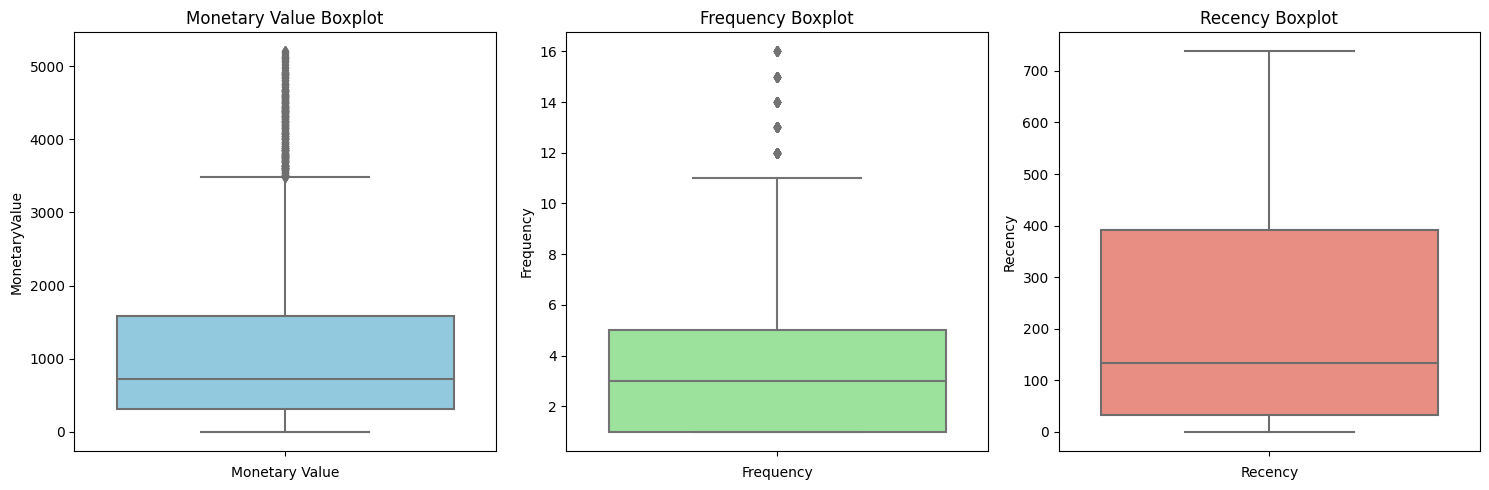

In [32]:
plt.figure(figsize=(15, 5))

# Plot 1: Monetary Value Boxplot
plt.subplot(1, 3, 1)
sns.boxplot(y=non_outliers_df['MonetaryValue'], color='skyblue')
plt.title('Monetary Value Boxplot')
plt.xlabel('Monetary Value')

# Plot 2: Frequency Boxplot
plt.subplot(1, 3, 2)
sns.boxplot(y=non_outliers_df['Frequency'], color='lightgreen')
plt.title('Frequency Boxplot')
plt.xlabel('Frequency')

# Plot 3: Recency Boxplot
plt.subplot(1, 3, 3)
sns.boxplot(y=non_outliers_df['Recency'], color='salmon')
plt.title('Recency Boxplot')
plt.xlabel('Recency')

# Adjust layout
plt.tight_layout()
plt.show()


Currently excluding outliers from the analysis but they are important and should not be excluded because the outliers represent customers who have spent alot, customers who buy very frequently and customers who buy frequently hence spending alot. The outliers can be considered later.

**Scaling** the data using standard scaling.

Text(0.5, 0.92, '3D Scatter plot of customer data')

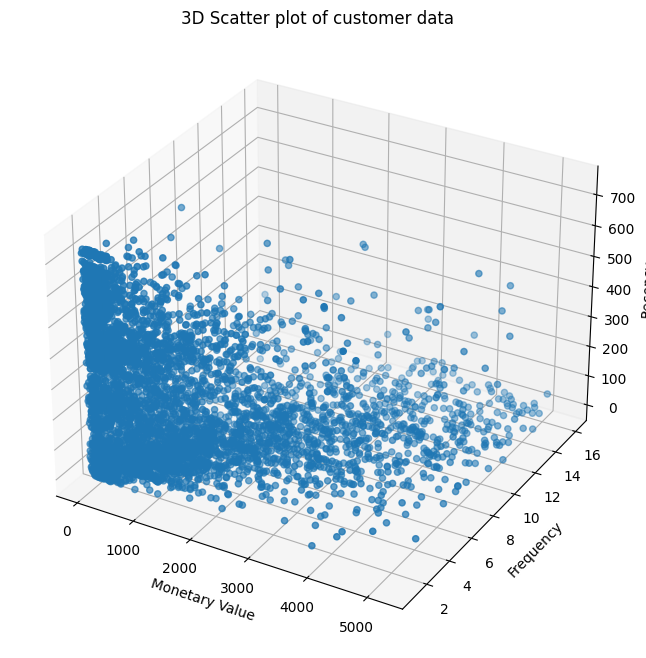

In [33]:
fig = plt.figure(figsize=(15,8))

ax = fig.add_subplot(projection = "3d")

scatter = ax.scatter(non_outliers_df["MonetaryValue"],non_outliers_df["Frequency"],non_outliers_df["Recency"])

ax.set_xlabel("Monetary Value")
ax.set_ylabel("Frequency")
ax.set_zlabel("Recency")

ax.set_title('3D Scatter plot of customer data')

Standard scaling transforms the features of your data to have a mean of 0 and a standard deviation of 1, ensuring that each feature contributes equally to the analysis.

***z = (x - u) / s***

Where:

* ***z*** is the standardized value,
* ***x*** is the original value,
* ***u*** is the mean of the feature,
* ***s*** is the standard deviation of the feature.

In [34]:
scaler = StandardScaler()

scaled_data = scaler.fit_transform(non_outliers_df[["MonetaryValue", "Frequency", "Recency"]])

scaled_data

array([[ 0.46495994,  0.41035762, -0.68639195],
       [ 2.25462817, -0.21575129, -0.95167175],
       [-0.74333563, -0.84186021,  0.42683577],
       ...,
       [-0.67016465, -0.84186021,  2.08957165],
       [ 0.10001748, -0.52880575,  1.21793803],
       [ 2.65706855,  1.03646654, -0.8379804 ]])

In [35]:
scaled_data_df = pd.DataFrame(scaled_data, index = non_outliers_df.index, columns = ("MonetaryValue", "Frequency", "Recency"))
scaled_data_df

,MonetaryValue,Frequency,Recency
2,0.46,0.41,-0.69
3,2.25,-0.22,-0.95
4,-0.74,-0.84,0.43
5,-0.74,-0.84,0.73
6,0.53,1.66,-0.87
...,...,...,...
5846,-0.85,-0.53,-1.00
5848,-0.64,-0.84,1.00
5849,-0.67,-0.84,2.09
5850,0.10,-0.53,1.22


Text(0.5, 0.92, '3D Scatter plot of customer data')

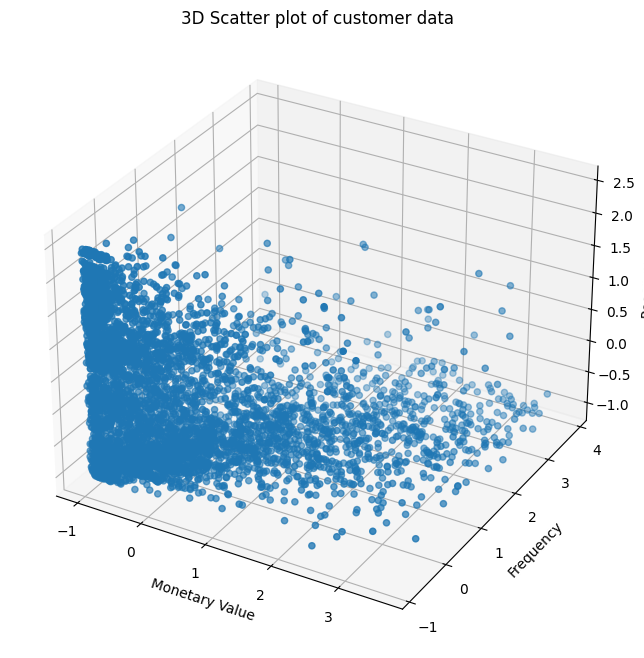

In [36]:
fig = plt.figure(figsize=(15,8))

ax = fig.add_subplot(projection = "3d")

scatter = ax.scatter(scaled_data_df["MonetaryValue"],scaled_data_df["Frequency"],scaled_data_df["Recency"])

ax.set_xlabel("Monetary Value")
ax.set_ylabel("Frequency")
ax.set_zlabel("Recency")

ax.set_title('3D Scatter plot of customer data')

## KMeans Clustering
---

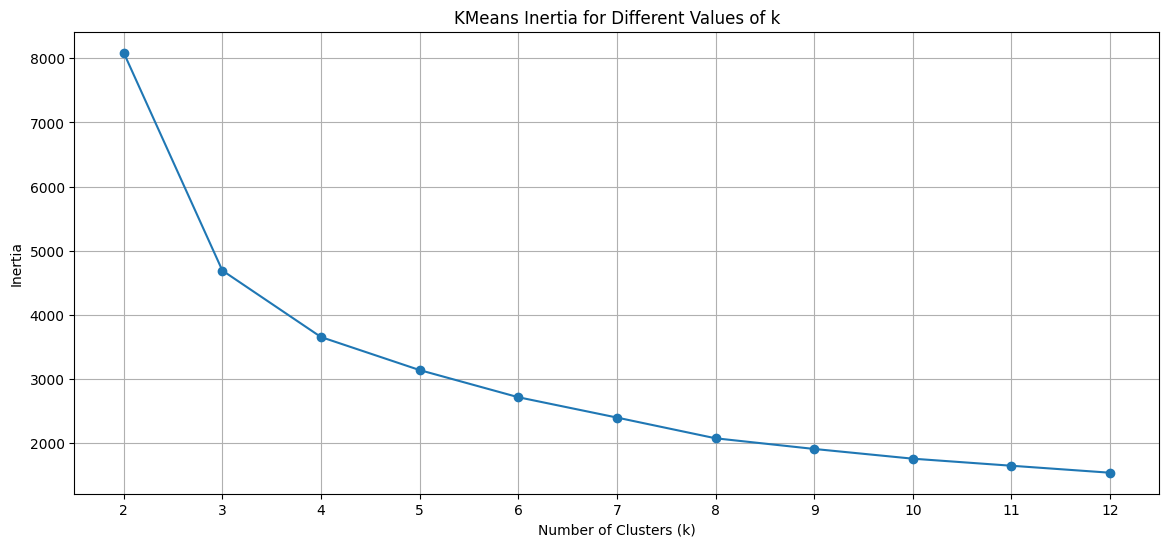

In [37]:
max_k = 12

inertia = [] # average distance between the cluster centers
k_values = range(2, max_k + 1) # no of cluster centers

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, max_iter=1000, n_init=10)

    kmeans.fit_predict(scaled_data_df)
    
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(14,6))

plt.plot(k_values, inertia, marker='o')
plt.title('KMeans Inertia for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)

plt.show()

No. of clusters 4 and 5 seem to be about the elbow point and adding more clusters does not look more efficient.

We are going to use another metric to decide between weather to have 4 or 5 clusters which is going to be Silhouette Score. The formula for it is give below:

$$
s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}
$$

Where:
- $s(i)$ is the silhouette score for a single sample $i$
- $a(i)$ is the average distance between $i$ and all other points in the same cluster,
- $b(i)$ is the minimum average distance between $i$ and all points in the nearest cluster to which $i$ does not belong.

The silhoutte score ranges between $[-1, 1]$, a higher value indicates more distinct clusters.

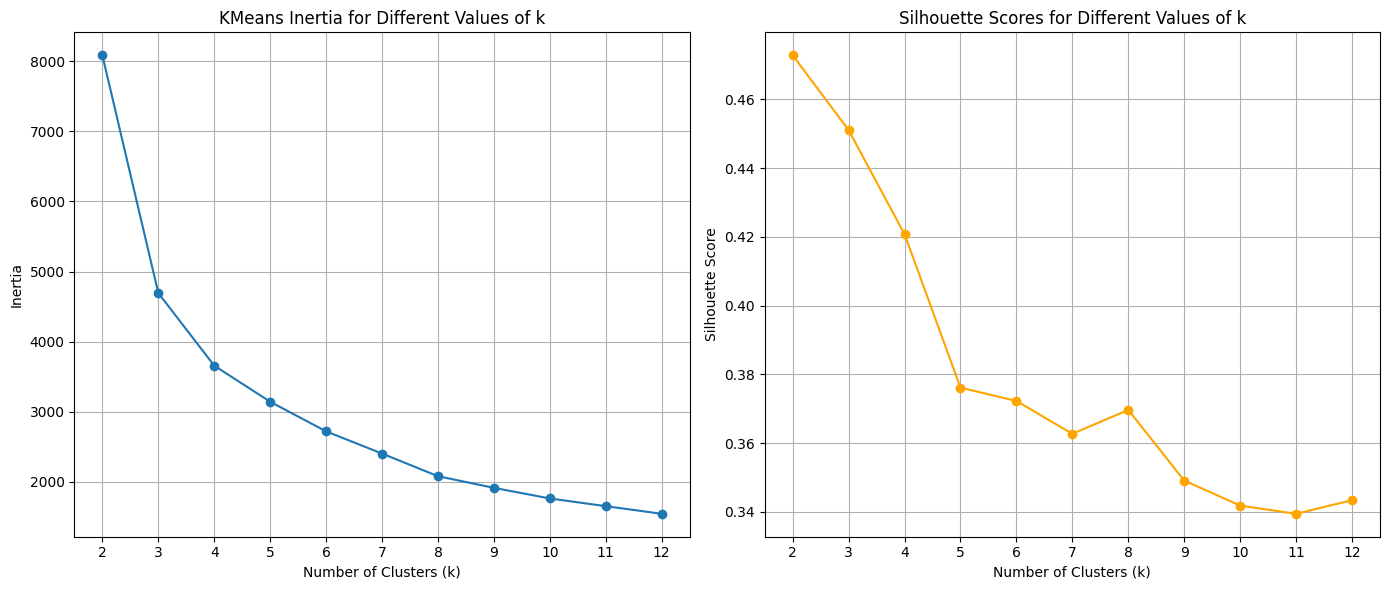

In [38]:
max_k = 12

inertia = []
silhoutte_scores = []
k_values = range(2, max_k + 1)

for k in k_values:

    kmeans = KMeans(n_clusters=k, random_state=42, max_iter=1000, n_init=10)

    cluster_labels = kmeans.fit_predict(scaled_data_df)

    sil_score = silhouette_score(scaled_data_df, cluster_labels)

    silhoutte_scores.append(sil_score)

    inertia.append(kmeans.inertia_)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker='o')
plt.title('KMeans Inertia for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(k_values, silhoutte_scores, marker='o', color='orange')
plt.title('Silhouette Scores for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid(True)

plt.tight_layout()
plt.show()

The 4 cluster option has a better silhoutte score than 5 cluster, so the 4 cluster option is better.

In [39]:
kmeans = KMeans(n_clusters=4, random_state=42, max_iter=1000, n_init=10)

cluster_labels = kmeans.fit_predict(scaled_data_df)

cluster_labels

array([0, 0, 3, ..., 3, 3, 2], dtype=int32)

In [40]:
non_outliers_df["Cluster"] = cluster_labels

non_outliers_df

/tmp/ipykernel_18/3577770544.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_outliers_df["Cluster"] = cluster_labels


,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
2,12348.00,1658.40,5,2011-09-25 13:13:00,74,0
3,12349.00,3678.69,3,2011-11-21 09:51:00,18,0
4,12350.00,294.40,1,2011-02-02 16:01:00,309,3
5,12351.00,300.93,1,2010-11-29 15:23:00,374,3
6,12352.00,1729.54,9,2011-11-03 14:37:00,35,0
...,...,...,...,...,...,...
5846,18282.00,178.05,2,2011-12-02 11:43:00,7,1
5848,18284.00,411.68,1,2010-10-04 11:33:00,431,3
5849,18285.00,377.00,1,2010-02-17 10:24:00,660,3
5850,18286.00,1246.43,2,2010-08-20 11:57:00,476,3


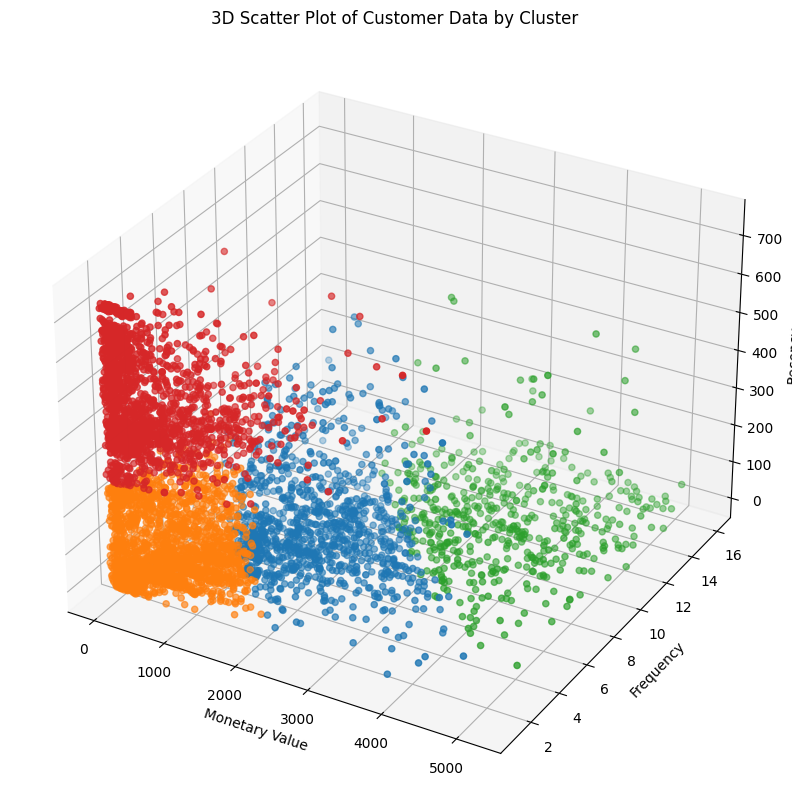

In [41]:
cluster_colors = {0: '#1f77b4',  # Blue
                  1: '#ff7f0e',  # Orange
                  2: '#2ca02c',  # Green
                  3: '#d62728'}  # Red

colors = non_outliers_df['Cluster'].map(cluster_colors)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

scatter = ax.scatter(non_outliers_df['MonetaryValue'], 
                     non_outliers_df['Frequency'], 
                     non_outliers_df['Recency'], 
                     c=colors,  # Use mapped solid colors
                     marker='o')

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Scatter Plot of Customer Data by Cluster')

plt.show()

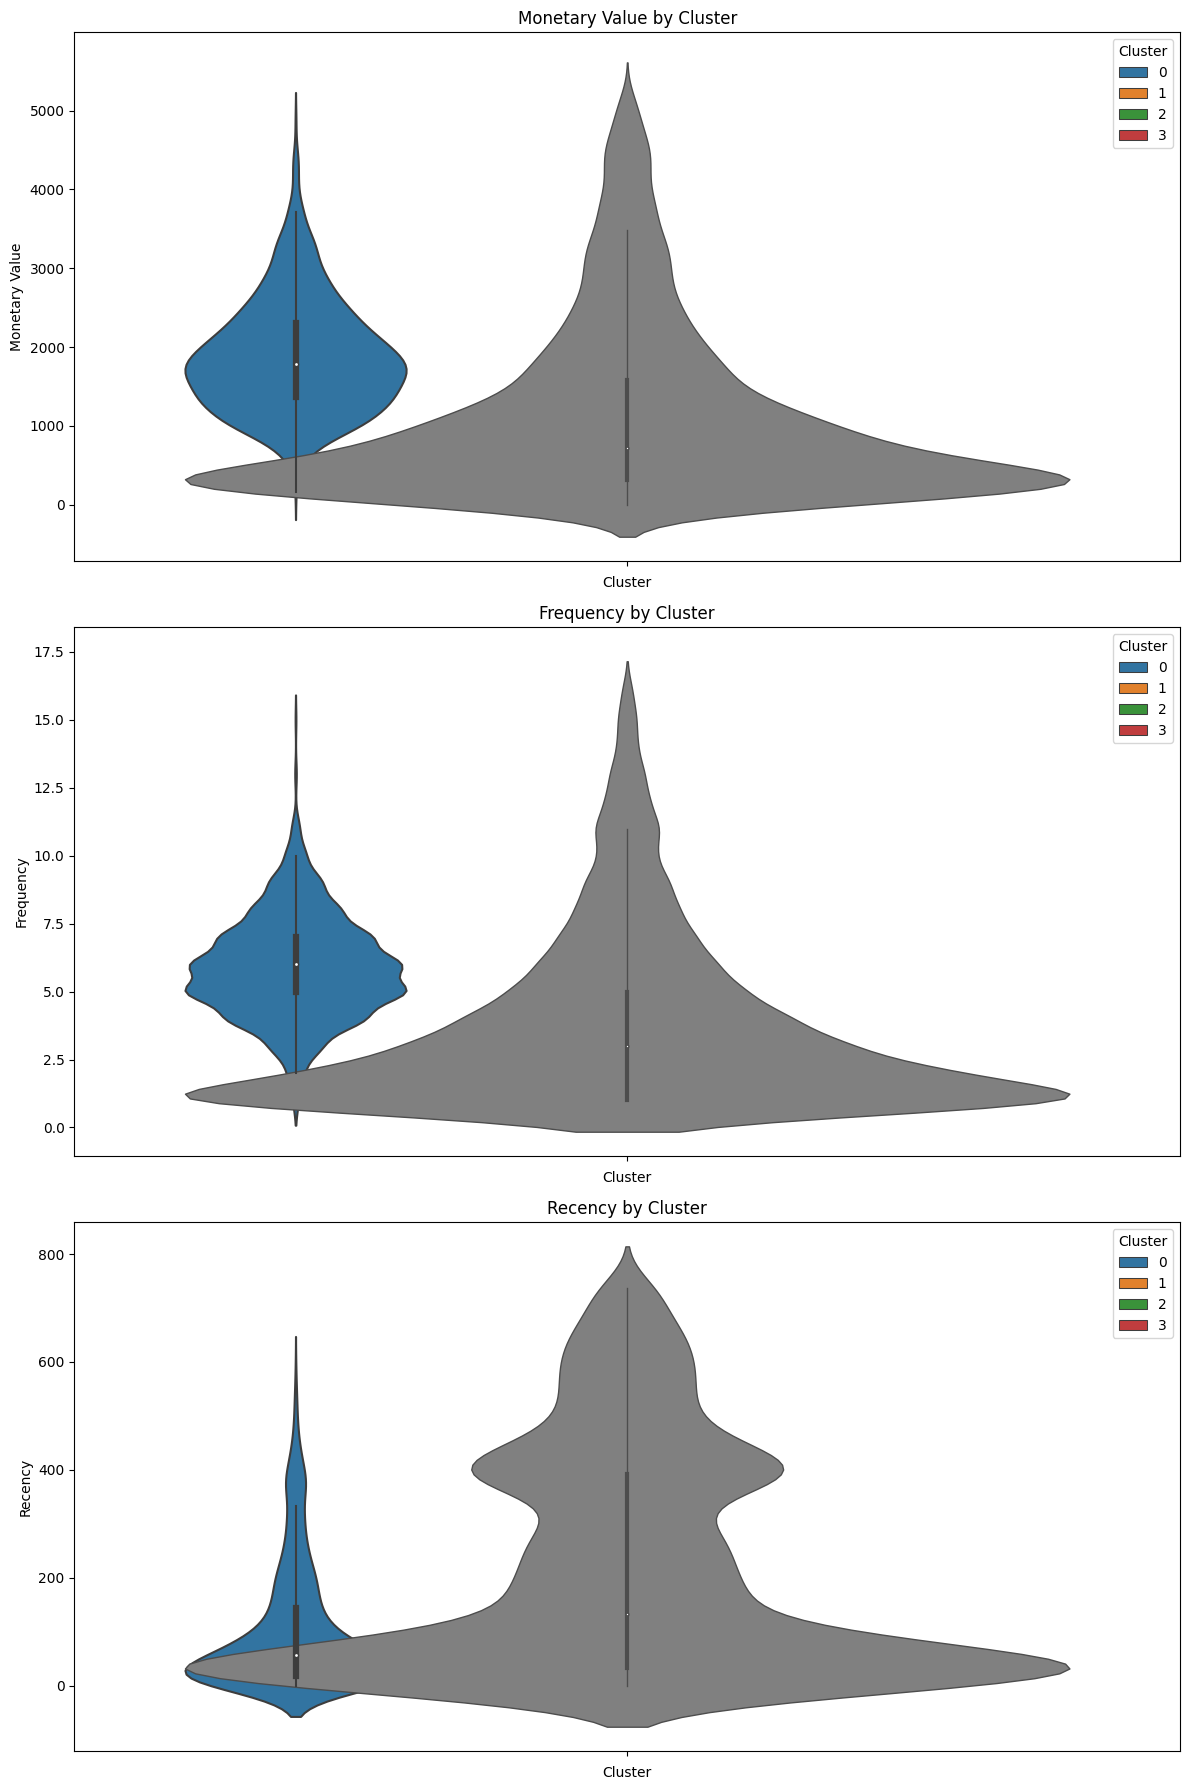

In [42]:
plt.figure(figsize=(12, 18))

plt.subplot(3, 1, 1)
sns.violinplot(x=non_outliers_df['Cluster'], y=non_outliers_df['MonetaryValue'], palette=cluster_colors, hue=non_outliers_df["Cluster"])
sns.violinplot(y=non_outliers_df['MonetaryValue'], color='gray', linewidth=1.0)
plt.title('Monetary Value by Cluster')
plt.ylabel('Monetary Value')

plt.subplot(3, 1, 2)
sns.violinplot(x=non_outliers_df['Cluster'], y=non_outliers_df['Frequency'], palette=cluster_colors, hue=non_outliers_df["Cluster"])
sns.violinplot(y=non_outliers_df['Frequency'], color='gray', linewidth=1.0)
plt.title('Frequency by Cluster')
plt.ylabel('Frequency')


plt.subplot(3, 1, 3)
sns.violinplot(x=non_outliers_df['Cluster'], y=non_outliers_df['Recency'], palette=cluster_colors, hue=non_outliers_df["Cluster"])
sns.violinplot(y=non_outliers_df['Recency'], color='gray', linewidth=1.0)
plt.title('Recency by Cluster')
plt.ylabel('Recency')

plt.tight_layout()
plt.show()

1. Cluster 0 (Blue): "Retain"
* Rationale: This cluster represents high-value customers who purchase regularly, though not always very recently. The focus should be on retention efforts to maintain their loyalty and spending levels.
* Action: Implement loyalty programs, personalized offers, and regular engagement to ensure they remain active.

2. Cluster 1 (Orange): "Nurture"
* Rationale: This cluster represents the least active and lowest-value customers, but they have made recent purchases. These customers may be new or need nurturing to increase their engagement and spending.
* Action: Focus on building relationships, providing excellent customer service, and offering incentives to encourage more frequent purchases.

3. Cluster 2 (Green):  "Reward"
* Rationale: This cluster includes high-value, very frequent buyers, many of whom are still actively purchasing. They are your most loyal customers, and rewarding their loyalty is key to maintaining their engagement.
* Action: Implement a robust loyalty program, provide exclusive offers, and recognize their loyalty to keep them engaged and satisfied.

4. Cluster 3 (Red): "Re-Engage"
* Rationale: This group includes lower-value, infrequent buyers who haven’t purchased recently. The focus should be on re-engagement to bring them back into active purchasing behavior.
* Action: Use targeted marketing campaigns, special discounts, or reminders to encourage them to return and purchase again.


**Summary of Cluster Names:**

* Cluster 0 (Blue): "Retain"
* Cluster 1 (Orange): "Nurture"
* Cluster 2 (Green): "Reward"
* Cluster 3 (Red): "Re-Engage"

Now we can take into consideration the outliers for monetary and frquency that we ignored but were valuable customers.

In [43]:
overlap_indices = monetary_outliers_df.index.intersection(frequency_outliers_df.index)

monetary_only_outliers = monetary_outliers_df.drop(overlap_indices)
frequency_only_outliers = frequency_outliers_df.drop(overlap_indices)
monetary_and_frequency_outliers = monetary_outliers_df.loc[overlap_indices]

monetary_only_outliers["Cluster"] = -1
frequency_only_outliers["Cluster"] = -2
monetary_and_frequency_outliers["Cluster"] = -3

outlier_clusters_df = pd.concat([monetary_only_outliers, frequency_only_outliers, monetary_and_frequency_outliers])

outlier_clusters_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
0,12346.00,77352.96,3,2011-01-18 10:01:00,325,-1
1,12347.00,5633.32,8,2011-12-07 15:52:00,1,-1
10,12356.00,5613.68,6,2011-11-17 08:40:00,22,-1
11,12357.00,17437.66,2,2011-11-06 16:07:00,32,-1
13,12359.00,8935.94,10,2011-10-13 12:47:00,57,-1
...,...,...,...,...,...,...
5790,18226.00,11878.88,26,2011-10-26 13:36:00,43,-3
5793,18229.00,10803.71,28,2011-11-28 09:48:00,11,-3
5795,18231.00,6875.07,28,2011-05-31 14:18:00,191,-3
5809,18245.00,6324.98,20,2011-12-02 14:48:00,6,-3


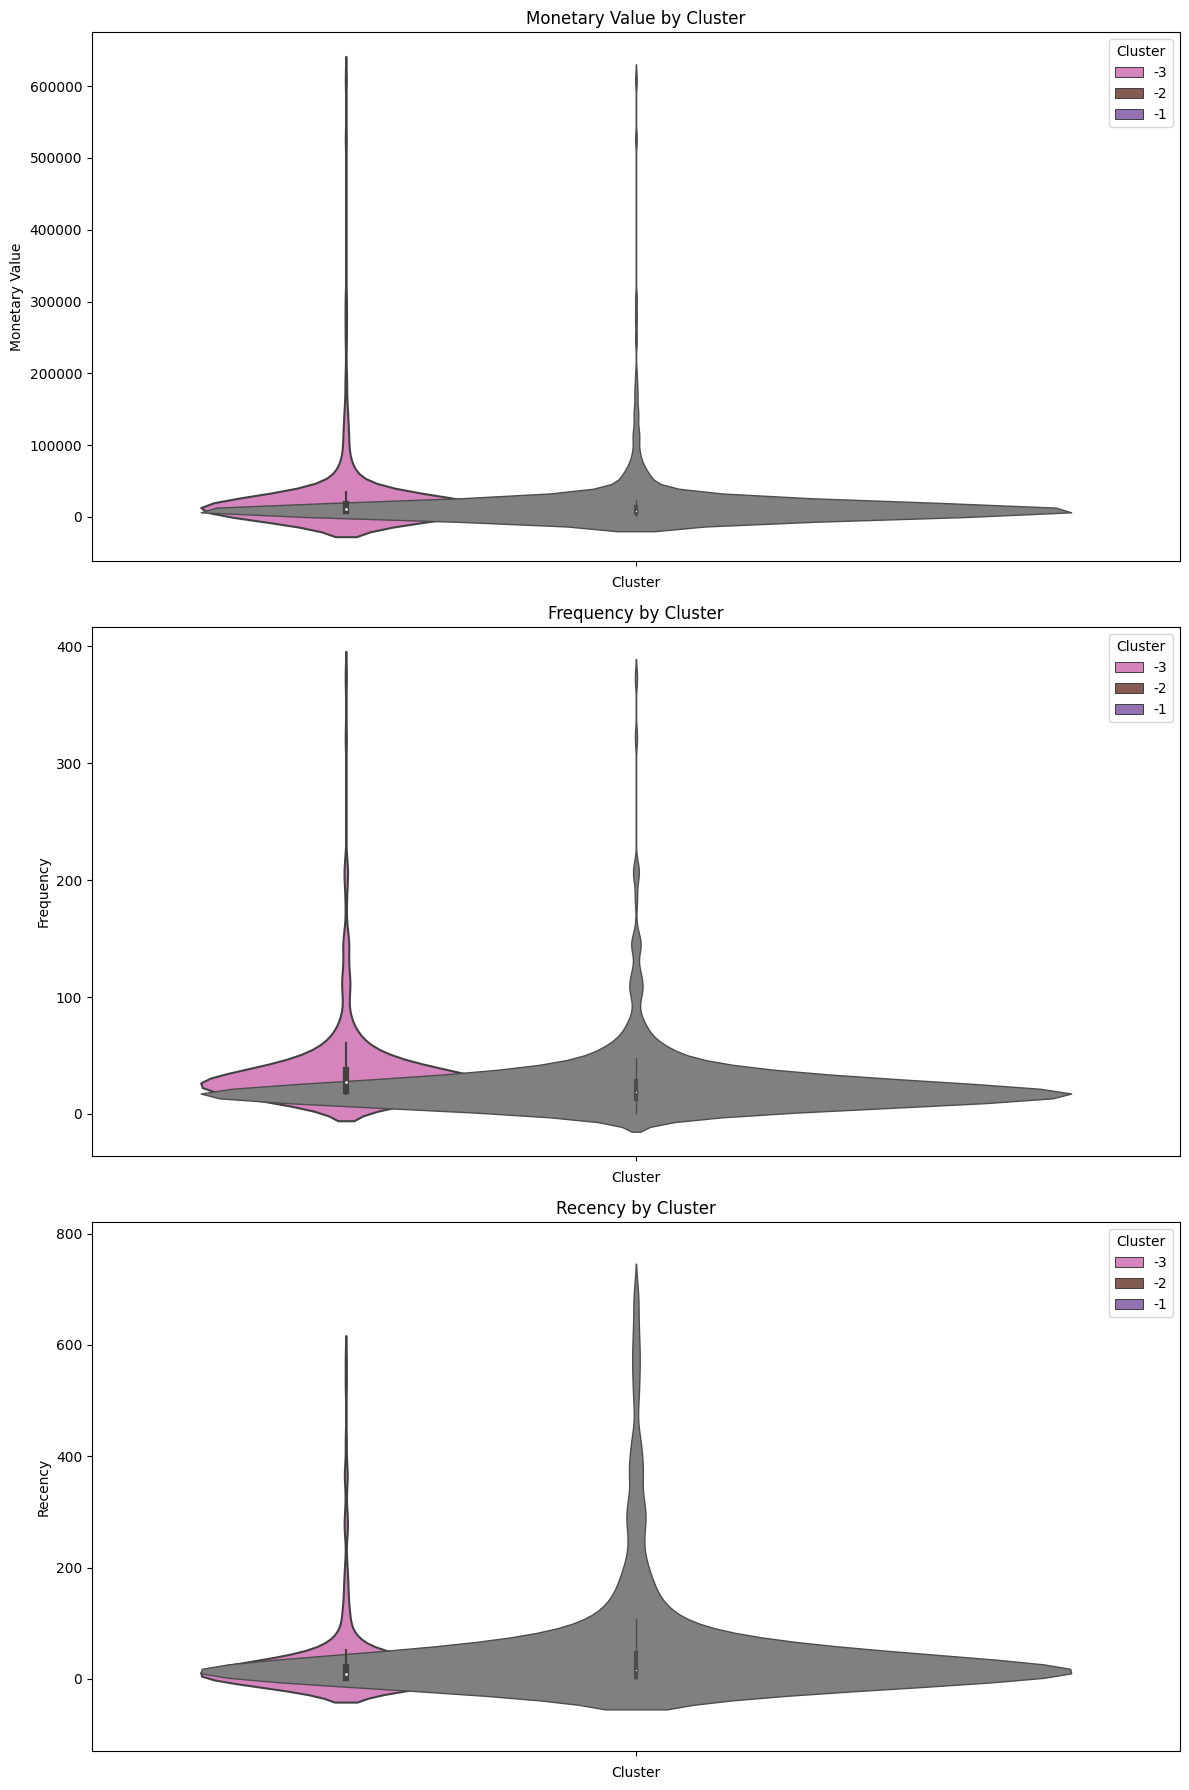

In [44]:
cluster_colors = {-1: '#9467bd',
                  -2: '#8c564b',
                  -3: '#e377c2'}

plt.figure(figsize=(12, 18))

plt.subplot(3, 1, 1)
sns.violinplot(x=outlier_clusters_df['Cluster'], y=outlier_clusters_df['MonetaryValue'], palette=cluster_colors, hue=outlier_clusters_df["Cluster"])
sns.violinplot(y=outlier_clusters_df['MonetaryValue'], color='gray', linewidth=1.0)
plt.title('Monetary Value by Cluster')
plt.ylabel('Monetary Value')

plt.subplot(3, 1, 2)
sns.violinplot(x=outlier_clusters_df['Cluster'], y=outlier_clusters_df['Frequency'], palette=cluster_colors, hue=outlier_clusters_df["Cluster"])
sns.violinplot(y=outlier_clusters_df['Frequency'], color='gray', linewidth=1.0)
plt.title('Frequency by Cluster')
plt.ylabel('Frequency')

plt.subplot(3, 1, 3)
sns.violinplot(x=outlier_clusters_df['Cluster'], y=outlier_clusters_df['Recency'], palette=cluster_colors, hue=outlier_clusters_df["Cluster"])
sns.violinplot(y=outlier_clusters_df['Recency'], color='gray', linewidth=1.0)
plt.title('Recency by Cluster')
plt.ylabel('Recency')

plt.tight_layout()
plt.show()

* Cluster -1 (Monetary Outliers) PAMPER:
Characteristics: High spenders but not necessarily frequent buyers. Their purchases are large but infrequent.
Potential Strategy: Focus on maintaining their loyalty with personalized offers or luxury services that cater to their high spending capacity.

* Cluster -2 (Frequency Outliers) UPSELL:
Characteristics: Frequent buyers who spend less per purchase. These customers are consistently engaged but might benefit from upselling opportunities.
Potential Strategy: Implement loyalty programs or bundle deals to encourage higher spending per visit, given their frequent engagement.

* Cluster -3 (Monetary & Frequency Outliers) DELIGHT:
Characteristics: The most valuable outliers, with extreme spending and frequent purchases. They are likely your top-tier customers who require special attention.
Potential Strategy: Develop VIP programs or exclusive offers to maintain their loyalty and encourage continued engagement.

In [45]:
cluster_labels = {
    0: "RETAIN",
    1: "NURTURE",
    2: "REWARD",
    3: "RE-ENGAGE",
    -1: "PAMPER",
    -2: "UPSELL",
    -3: "DELIGHT"
}

In [46]:
full_clustering_df = pd.concat([non_outliers_df, outlier_clusters_df])

full_clustering_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
2,12348.00,1658.40,5,2011-09-25 13:13:00,74,0
3,12349.00,3678.69,3,2011-11-21 09:51:00,18,0
4,12350.00,294.40,1,2011-02-02 16:01:00,309,3
5,12351.00,300.93,1,2010-11-29 15:23:00,374,3
6,12352.00,1729.54,9,2011-11-03 14:37:00,35,0
...,...,...,...,...,...,...
5790,18226.00,11878.88,26,2011-10-26 13:36:00,43,-3
5793,18229.00,10803.71,28,2011-11-28 09:48:00,11,-3
5795,18231.00,6875.07,28,2011-05-31 14:18:00,191,-3
5809,18245.00,6324.98,20,2011-12-02 14:48:00,6,-3


In [47]:
full_clustering_df["ClusterLabel"] = full_clustering_df["Cluster"].map(cluster_labels)

full_clustering_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster,ClusterLabel
2,12348.00,1658.40,5,2011-09-25 13:13:00,74,0,RETAIN
3,12349.00,3678.69,3,2011-11-21 09:51:00,18,0,RETAIN
4,12350.00,294.40,1,2011-02-02 16:01:00,309,3,RE-ENGAGE
5,12351.00,300.93,1,2010-11-29 15:23:00,374,3,RE-ENGAGE
6,12352.00,1729.54,9,2011-11-03 14:37:00,35,0,RETAIN
...,...,...,...,...,...,...,...
5790,18226.00,11878.88,26,2011-10-26 13:36:00,43,-3,DELIGHT
5793,18229.00,10803.71,28,2011-11-28 09:48:00,11,-3,DELIGHT
5795,18231.00,6875.07,28,2011-05-31 14:18:00,191,-3,DELIGHT
5809,18245.00,6324.98,20,2011-12-02 14:48:00,6,-3,DELIGHT


## Visualisation

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


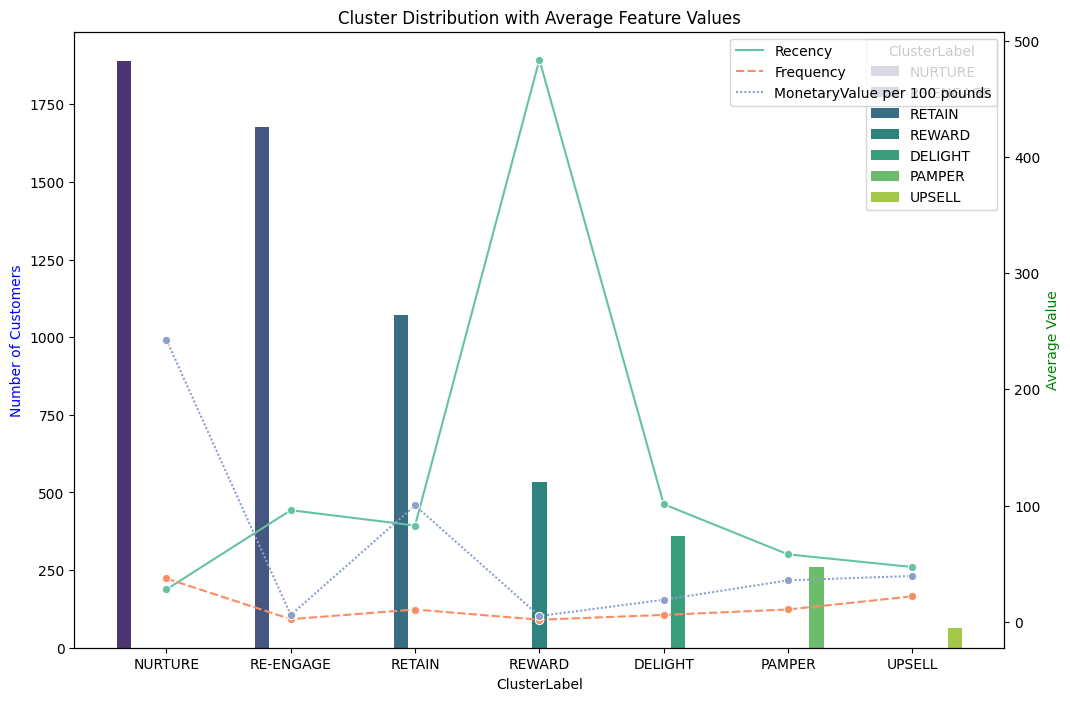

In [48]:
cluster_counts = full_clustering_df['ClusterLabel'].value_counts()
full_clustering_df["MonetaryValue per 100 pounds"] = full_clustering_df["MonetaryValue"] / 100.00
feature_means = full_clustering_df.groupby('ClusterLabel')[['Recency', 'Frequency', 'MonetaryValue per 100 pounds']].mean()

fig, ax1 = plt.subplots(figsize=(12, 8))

sns.barplot(x=cluster_counts.index, y=cluster_counts.values, ax=ax1, palette='viridis', hue=cluster_counts.index)
ax1.set_ylabel('Number of Customers', color='b')
ax1.set_title('Cluster Distribution with Average Feature Values')

ax2 = ax1.twinx()

sns.lineplot(data=feature_means, ax=ax2, palette='Set2', marker='o')
ax2.set_ylabel('Average Value', color='g')

plt.show()